In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from collections import defaultdict

from MEtry import prod_type_dict

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

%matplotlib notebook

plot_data = pd.read_pickle('plot_data.pickle')

In [2]:
from collections import OrderedDict
from math import log, sqrt

import numpy as np
import pandas as pd

from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool
from bokeh.charts import Donut

# visualization 1
plot_data.drop(plot_data[(plot_data.titer<=0) | (plot_data.product_name=='hydrogen')].index,inplace=True)

v_data1=plot_data.groupby('product_name')['titer'].agg({'Median Titer(g/L)': np.median, \
                                                    'Max Titre(g/L)': np.max, 'Min Titre(g/L)': np.min})
plot_data['m100']=plot_data.mw>=100
size_dict=dict(zip(plot_data.product_name,plot_data.m100))
v_data1.reset_index(inplace=True)
# v_data1['Compound']=v_data1.product_name.apply(lambda x: 'Large' if size_dict[x] else 'Small')
v_data1['Compound']=v_data1.product_name.apply(lambda x: 'Native product' if prod_type_dict[x]==0 else 'Non-native product')
v_data1.sort_values(by=['Compound'],axis=0,inplace=True,ascending=True)
v_data1.reset_index(inplace=True)



var_color = OrderedDict([
    ('Median Titer(g/L)',   "#0d3362"),
    ('Max Titre(g/L)', "#c64737"),
    ('Min Titre(g/L)',     "black"  ),
])

mw_color = {
    "Native product" : "#aeaeb8",
    "Non-native product" : "#e69584",
}


width = 800
height = 800
inner_radius = 90
outer_radius = 300 - 10

minr = sqrt(log(.001 * 1E6))
maxr = sqrt(log(1000 * 1E6))
a = (outer_radius - inner_radius) / (minr - maxr)
b = inner_radius - a * maxr

def rad(mic):
    return (-(outer_radius-inner_radius)/(minr-maxr)) * (np.sqrt(np.log(mic * 1E6)) - minr) + inner_radius
big_angle = 2.0 * np.pi / (len(v_data1) + 1)
small_angle = big_angle / 7

p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-420, 420), y_range=(-420, 420),
    min_border=0, outline_line_color="black",
    background_fill_color="#f0e1d2", border_fill_color="#f0e1d2",
    toolbar_sticky=False)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# annular wedges
angles = np.pi/2 - big_angle/2 - v_data1.index.to_series()*big_angle
colors = [mw_color[sz] for sz in v_data1.Compound]
p.annular_wedge(
    0, 0, inner_radius, outer_radius, -big_angle+angles, angles, color=colors,
)

# small wedges
p.annular_wedge(0, 0, inner_radius, rad(v_data1['Median Titer(g/L)']),
                -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
                direction='anticlock',color=var_color['Median Titer(g/L)'])
p.annular_wedge(0, 0, inner_radius, rad(v_data1['Max Titre(g/L)']),
                -big_angle+angles+3*small_angle, -big_angle+angles+4*small_angle,
                color=var_color['Max Titre(g/L)'])
p.annular_wedge(0, 0, inner_radius, rad(v_data1['Min Titre(g/L)']),
                -big_angle+angles+1*small_angle, -big_angle+angles+2*small_angle,
                color=var_color['Min Titre(g/L)'])

# circular axes and lables
labels = np.power(10.0, np.arange(-3, 4))
radii=(-(outer_radius-inner_radius)/(minr-maxr)) * (np.sqrt(np.log(labels * 1E6)) - minr) + inner_radius
p.circle(0, 0, radius=radii, fill_color=None, line_color="white")
p.text(0, radii[:-1], [str(r) for r in labels[:-1]],
       text_font_size="12pt", text_align="center", text_baseline="middle",text_font_style='bold')

# radial axes
p.annular_wedge(0, 0, inner_radius-10, outer_radius+10,
                -big_angle+angles, -big_angle+angles, color="black")

# product labels
radii=((outer_radius-inner_radius)/(minr-maxr)) * (np.sqrt(np.log(labels * 1E6)) - maxr) + inner_radius
xr = radii[0]*np.cos(np.array(-big_angle/2 + angles))
yr = radii[0]*np.sin(np.array(-big_angle/2 + angles))
label_angle=np.array(-big_angle/2+angles)
label_angle[label_angle < -np.pi/2] += np.pi # easier to read labels on the left side
p.text(xr, yr, v_data1.product_name, angle=label_angle,
       text_font_size="12pt", text_align="center", text_baseline="middle",text_font_style='bold')

# OK, these hand drawn legends are pretty clunky, will be improved in future release
p.circle([-40, -40], [-370, -390], color=list(mw_color.values()), radius=5)
p.text([-30, -30], [-370, -390], text=[mw  for mw in mw_color.keys()],
       text_font_size="15pt", text_align="left", text_baseline="middle",text_font_style='bold')

p.rect([-40, -40, -40], [18, 0, -18], width=30, height=13,
       color=list(var_color.values()))
p.text([-15, -15, -15], [18, 0, -18], text=list(var_color),
       text_font_size="8pt", text_align="left", text_baseline="middle",text_font_style='bold')

output_file("MEdatabase.html", title="Summary of Metabolic Engineering Designs")

show(p)


GlyphRenderer(id='fdc5301f-507d-4e67-af3b-147164197329', ...)

GlyphRenderer(id='24ff234b-f0f5-4647-82f2-1f82bf542101', ...)

GlyphRenderer(id='9c46b8a8-506f-4a92-b37d-3b0bcaafe9d0', ...)

GlyphRenderer(id='8f8c598b-a60b-4b30-a205-ef074d83bdef', ...)

GlyphRenderer(id='3afe560b-e4c3-45cd-8810-03951ec3459d', ...)

GlyphRenderer(id='440d7237-9b07-458a-b880-5ec62fce5a17', ...)

GlyphRenderer(id='d279c8a7-09af-43cd-8dc9-95efb4e4112e', ...)

GlyphRenderer(id='9ede6ed4-1589-460d-9a2e-55cba304039f', ...)

GlyphRenderer(id='aa5fb2db-53e6-468d-948f-604aa8e5bd9f', ...)

GlyphRenderer(id='45dd9abe-abe6-473c-80a8-76b62de81c5d', ...)

GlyphRenderer(id='b54535fe-1d8a-4213-b1d9-918a91c0d80e', ...)

GlyphRenderer(id='2e53d180-e05d-400a-b6ee-bab2d5f6fea6', ...)

In [4]:
try_data.rate.max()
try_data.rate.min()

10.824999999999999

4.2549999999999997e-05

<IPython.core.display.Javascript object>


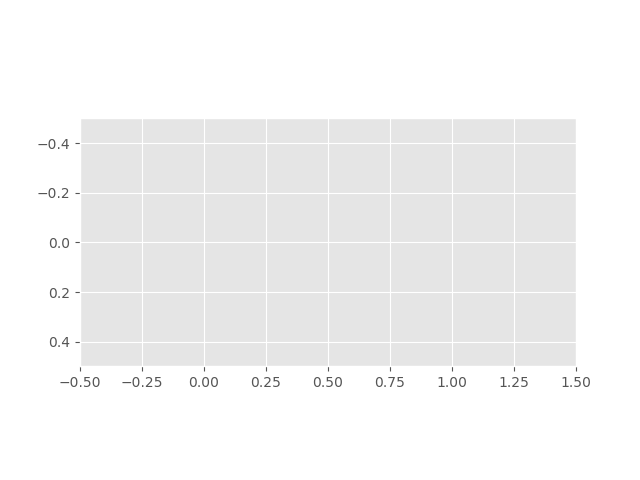

<IPython.core.display.Javascript object>


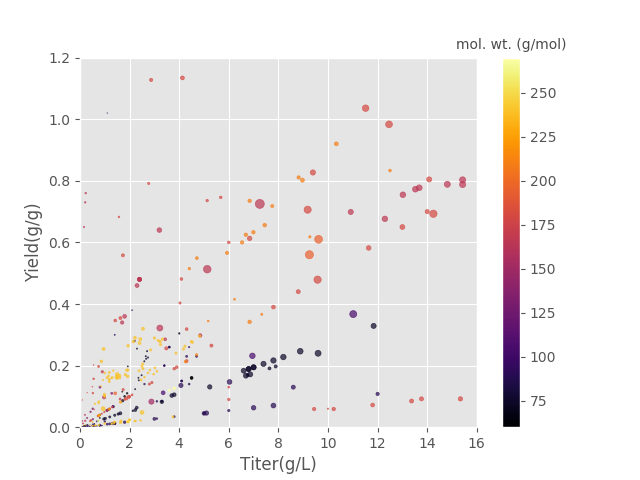

(None, None)

In [3]:
# complete data set for titer, rate and yield visualization (rate as marker size, color as product type)
# next step: 1) correlate color scale with product mw dist 2) log scale plots / plot inserts
from matplotlib import style
import matplotlib.cm as cm

style.use('ggplot')

try_data=plot_data.loc[:,['yield','titer','rate','product_name','mw']]
try_data.dropna(0,inplace=True) # using only complete points

try_data.sort_values(by='mw',inplace=True)


products=try_data.product_name.unique()
mws=try_data.mw.unique()

colors=cm.inferno(np.linspace(0,1,len(products)))
color_dict=dict(zip(products,colors))
mw_dict=dict(zip(products,mws))

try_data['dot_size']=(try_data.rate-try_data.rate.min())/(try_data.rate.max()-try_data.rate.min())*500
try_data['color']=try_data.product_name.apply(lambda x: color_dict[x])

img=plt.imshow(np.array([[np.min(mws),np.max(mws)]]),cmap='inferno')
img.set_visible(False)


fig,ax = plt.subplots()

lgd_dict= defaultdict(Line2D)
for product in products:
    lgd_dict[product]=Line2D(range(10), range(10), linestyle='none', marker='o',color=color_dict[product],alpha=0.7) 
    
_=ax.scatter(try_data.titer,try_data['yield'],s=try_data.dot_size,label=try_data.product_name,alpha=0.7,color=try_data.color)
_=ax.set_xlabel('Titer(g/L)')
_=ax.set_ylabel('Yield(g/g)')
_=ax.set_xlim(0,16)
_=ax.set_ylim(0,1.2)
# _=ax.set_yscale('log')
# _=ax.set_xscale('log')
cbar=fig.colorbar(img)
cbar.ax.set_title('mol. wt. (g/mol)',alpha=0.7,fontdict={'size':10})

Lines=[]
Labels=[]
for key, value in lgd_dict.items():
    Lines.append(value)
    Labels.append(key)

Lines.reverse(), Labels.reverse()
# _=plt.legend(Lines,Labels)



In [28]:
from numpy import pi
from random import shuffle
from math import sin,cos
from bokeh.plotting import ColumnDataSource,output_notebook,figure
from bokeh.charts import show,Donut
from bokeh.models import HoverTool,Text
from bokeh import palettes
import pandas as pd


class CustomPieBuilder:
    green ="#50ee70"
    red = "#ff7070"
    x_range = 1.1
    y_range = 1.1

    def __init__(self,df,label_name,column_name,tools='hover',tooltips=None,
                 reverse_color=False,colors=None,random_color_order=False,
                 plot_width=400,plot_height=400,title='Untitled',*args,**kwargs):
        p = self.setup_figure(tools,plot_width,plot_height,title)
        df = self.add_columns_for_pie_chart(df,column_name,colors,reverse_color,random_color_order)
        self.df = df
        self.plot_pie(p,df,label_name,*args,**kwargs)
        if tooltips:
            self.set_hover_tooltip(p,tooltips)

        self.add_text_label_on_pie(p,df,label_name)
        self.plot = p

    def setup_figure(self,tools,plot_width,plot_height,title):
        p = figure(
            x_range=(-self.x_range, self.x_range),
            y_range=(-self.y_range, self.y_range),
            tools=tools,
            plot_width=plot_width,
            plot_height=plot_height,
            title=title,
        )
        p.axis.visible = False
        p.xgrid.grid_line_color = None
        p.ygrid.grid_line_color = None
        return p

    @staticmethod
    def plot_pie(p,df,label_name,*args,**kwargs):
        for key, _df in df.groupby(label_name):
            source = ColumnDataSource(_df.to_dict(orient='list'))
            p.annular_wedge(
                x=0,
                y=0,
                inner_radius=0,
                outer_radius=1,
                start_angle='starts',
                end_angle='ends',
                color='colors',
                source=source,
#                 legend=key,
                *args,**kwargs)

    @staticmethod
    def set_hover_tooltip(p,tooltips):
        hover = p.select({'type':HoverTool})
        hover.tooltips = tooltips

    @staticmethod
    def add_columns_for_pie_chart(df,column_name,colors=None,reverse_color=False,random_color_order=False):
        r = 0.7
        df = df.copy()
        column_sum = df[column_name].sum()
        df['percentage'] = (df[column_name]/column_sum)
        percentages = [0]  + df['percentage'].cumsum().tolist()
        df['starts'] = [p * 2 * pi for p in percentages[:-1]]
        df['ends'] = [p * 2 * pi for p in percentages[1:]]

        df['middle'] = (df['starts'] + df['ends'])/2
        df['text_x'] = df['middle'].apply(cos)*r
        df['text_y'] =df['middle'].apply(sin)*r 
        df['text_angle'] = 0.0

        if colors:
            df['colors'] = colors
        else:
            if 'colors' not in df:
                reverse_color = -1 if reverse_color else 1
#                 colors = palettes.Category20(len(df))[::reverse_color]
                pal_used=palettes.Colorblind[7]
                colors=[]
                max_len=len(pal_used)
                for j in range(len(df)):
                    if j<max_len:
                        colors.append(pal_used[j])
                    else:
                        colors.append(pal_used[j-max_len])
        
                if random_color_order:
                    shuffle(colors)
                df['colors'] = colors
        return df

    @staticmethod
    def add_text_label_on_pie(p,df,label_name):
        source=ColumnDataSource(df.to_dict(orient='list'))
        txt = Text(x="text_x", y="text_y", text=label_name, angle="text_angle",
               text_align="center", text_baseline="middle",
               text_font_size='10pt',)
        p.add_glyph(source,txt)

def build_plot(df,label_name,column_name,tools='hover',tooltips=None,
                 reverse_color=False,colors=None,random_color_order=False,
                 plot_width=400,plot_height=400,title='Untitled',*args,**kwargs):

    customPie = CustomPieBuilder(df,label_name,column_name,tools,tooltips,
                 reverse_color,colors,random_color_order,
                 plot_width,plot_height,title,*args,**kwargs)

    return customPie.plot

In [ ]:
# visualization II
v_data2=plot_data.groupby('product_name').agg({'titre':{'No of designs':np.count_nonzero,'Median Titre': np.median},
                                               'yield':{'Median Yield': np.median},
                                               'rate':{'Median Rate': np.median}
                                              })
v_data2.reset_index(inplace=True)
v_data2.columns=['product_name','designs','titer','yield', 'rate']

v_data2.drop(axis=0,labels=v_data2[v_data2['designs']<10].index,inplace=True)
# TOOLS = "pan,wheel_zoom,reset,hover,save"
# pie_chart = Donut(v_data2,title='Summary of Metabolic Engineering designs',label='product_name', \
#                   values='Median_titre',plot_width=700,plot_height=700,tools=TOOLS)
# hover = pie_chart.select(dict(type=HoverTool))
# hover.point_policy='follow_mouse'
# hover.tooltips = [('Median', '@Median_titre'),('dummy','@product_name')]
# show(pie_chart)

p = build_plot(
    v_data2,
    'product_name',
    'designs',
    tooltips=[('Product name: ','@product_name'),('Designs: ', '@designs'),('Median titer(g/L)', '@titer') \
              ,('Median yield (g/g)', '@yield'), ('Median rate (g/L/h)', '@rate')],
    title='Summary of Metabolic Engineering designs',
    reverse_color=True,
    random_color_order=True,
    plot_height=700,
    plot_width=700,
    tools = ["pan,wheel_zoom,reset,hover,save"]
)

show(p)



In [ ]:
# visualization III
# !bokeh serve --port 3217 --show  Vis3/
# plot_data.columns

vis3_cols=['yield','titre','rate','bio_titre','rxt_volume','cs_conc1']
vis_data3=plot_data[vis3_cols]
vis_data3.columns=['Yield','Titer','Rate','Biomass_titer','Reactor_volume','Carbon_source_conc']

vis_data3.to_pickle(r'C:\Users\tolut\Box Sync\newDatabase\Data\Vis3\mydata') 

!bokeh serve --port 3559 --show  Vis3/

<IPython.core.display.Javascript object>


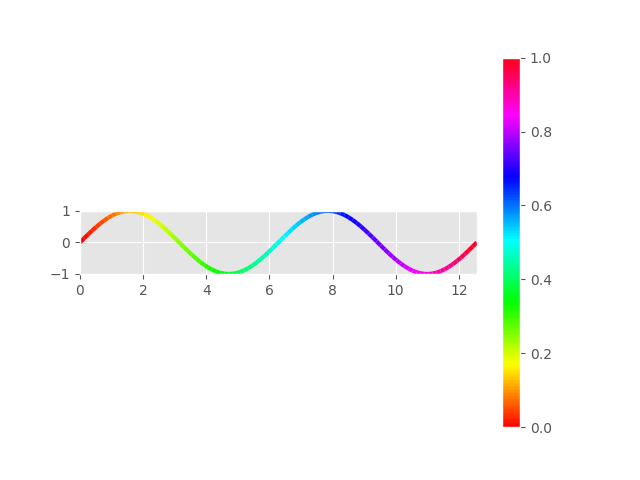

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll

def multicolored_lines():
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    """

    x = np.linspace(0, 4. * np.pi, 100)
    y = np.sin(x)
    fig, ax = plt.subplots()
    lc = colorline(x, y, cmap='hsv')
    plt.colorbar(lc)
    plt.xlim(x.min(), x.max())
    plt.ylim(-1.0, 1.0)
    plt.show()

def colorline(
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

multicolored_lines()